## install lightgbm, xgboost

__설치__

- [Install XGBoost and LightGBM on Apple M1 Macs](https://towardsdatascience.com/install-xgboost-and-lightgbm-on-apple-m1-macs-cb75180a2dda)

__참고문서__

- [How to use LightGBM and boosted decision trees to forecast sales](https://towardsdatascience.com/how-to-use-lightgbm-and-boosted-decision-trees-forecast-sales-cf65ce8ab645)

In [ ]:
# 임포트 테스트

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
# 정상 동작 테스트

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
print('make classification ...')
X,y = make_classification(n_samples=1000000,
                         n_features=50,
                         n_informative=30,
                         n_redundant=5,
                         n_repeated=0,
                         n_classes=2,
                         n_clusters_per_class=2,
                         class_sep=1,
                         flip_y=0.01,
                         weights=[0.5,0.5],
                         random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1000)
print(f'X_train shape: {X_train.shape}')
print(f'Train LGBM classifier ...')
clf = LGBMClassifier(n_estimators=100,
                     num_leaves=64,
                     max_depth=5,
                     learning_rate=0.1,
                     random_state=1000,
                     n_jobs=-1)
start = time.time()
clf.fit(X_train,y_train)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')
y_pred = clf.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test,y_pred):.2f}')
print(f'Train XGB classifier ...')
clf = XGBClassifier(n_estimators=100,
                     max_depth=5,
                     max_leaves=64,
                     eta=0.1,
                     reg_lambda=0,
                     tree_method='hist',
                     eval_metric='logloss',
                     use_label_encoder=False,
                     random_state=1000,
                     n_jobs=-1)
start = time.time()
clf.fit(X_train,y_train)
elapsed = time.time() - start
print(f'XGB Training ran in {elapsed:.5f} seconds')
y_pred = clf.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test,y_pred):.2f}')

make classification ...
X_train shape: (700000, 50)
Train LGBM classifier ...
LGBM Training ran in 22.38809 seconds
Test Accuracy: 0.96
Train XGB classifier ...
XGB Training ran in 39.45344 seconds
Test Accuracy: 0.96


---

## 리뷰 평점 데이터



In [ ]:
!pip install s3fs
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Pickle 파일 불러오기 안됨!!

#Import the library
import pickle5 as pickle
import pandas as pd
import s3fs

# path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/train_okt.pkl"
# path = 's3://tonyne-public/data/review_train_okt.pkl'

# FileNotFoundError: [Errno 2] No such file or directory
# with open(path, "rb") as dt:
#   df = pickle.load(dt, encoding='bytes')
#   df.head()

# ValueError: unsupported pickle protocol: 5
# df = pd.read_pickle(path)
# df.head()


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data")
!ls -l

Mounted at /gdrive
total 37315
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
-rw------- 1 root root  188888 Jul 24 12:01 submission.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv


In [ ]:
!ls -l /gdrive/My\ Drive/Colab\ Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/train_okt.*

-rw------- 1 root root 7916817 Jul 23 07:50 '/gdrive/My Drive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/train_okt.csv'


In [ ]:
import pandas as pd

# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# Okt.pos 토크나이징 : 조사와 알파벳 제거 
# ==> NaN 레코드 제거 (rows=24983)
file_path = f'{data_path}/train_okt.csv'

## CSV 로딩
train_df = pd.read_csv(file_path)
print(train_df.shape)

(24983, 8)


In [ ]:
train_df.tail()

,id,reviews,target,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
24978,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향 이 너무 너무 좋은데 지속 력 만 좋다면 좋겠지만 .. 워낙 저렴해 그래도...,일단 향 너무 너무 좋은데 지속 력 좋다면 좋겠지만 워낙 저렴해 그래도좋아,16,12,30
24979,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체 에서 발송 하고 한 상자 로 배송 되었는데 택배 비는 이중 처리 되었습...,동일한 업체 발송 한 상자 배송 되었는데 택배 비는 이중 처리 되었습니다,16,12,29
24980,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향 이 좋아요 !! 다른 향 도 시켜 보고 싶어요,향 좋아요 다른 향 시켜 보고 싶어요,10,7,14
24981,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐 보니 끝 부분 쯤 에 50 cm 정도 찟어져 있습니다 날짜 관계 로 구 냥 사...,펼쳐 보니 끝 부분 쯤 정도 찟어져 있습니다 날짜 관계 구 사용 합니다,18,13,27
24982,24999,호호애미 제품은 늘 믿고 써요,5,호호 애 미 제품 은 늘 믿고 써요,호호 애 미 제품 늘 믿고 써요,8,7,11


In [ ]:
# https://github.com/Haritha-kolli/lightgbm-LGBMRegressor/blob/main/PredictBookPrice.ipynb

import matplotlib.pyplot as plt
import seaborn as sns

# 격자 그래프 스타일
plt.style.use('ggplot')

from scipy.stats import skew,kurtosis,zscore

#Function to check the distribution across the numeric data in the dataset
def distribution_check(df,Cols):
    plt.figure(figsize=(25,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

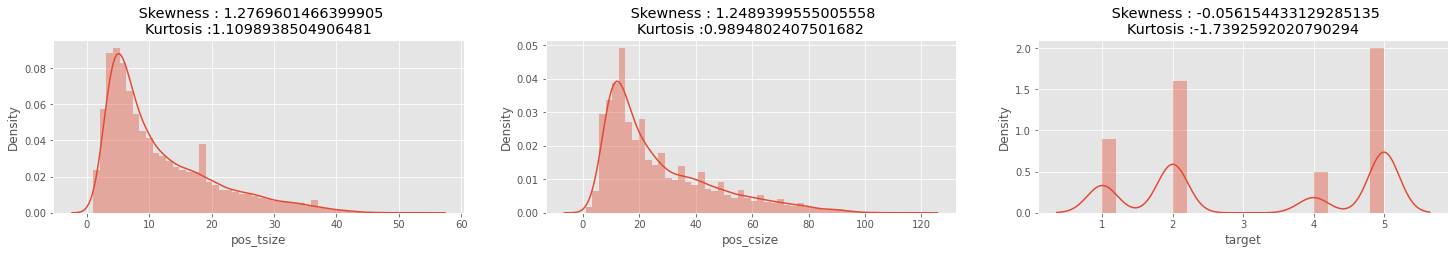

In [ ]:
distribution_check(train_df,['pos_tsize','pos_csize','target'])

---

### LightBGM 회귀 분석

- 정수형 target
  - r스퀘어 : 0.513
  - MSE : 1.311
- 실수형 ftarget
  - r스퀘어 : 0.509
  - MSE : 0.491

In [ ]:
from sklearn.model_selection import train_test_split

# train_df['ftarget'] = train_df['target'].apply(float)

data = train_df
X_train, X_test, y_train, y_test = train_test_split(
    data[ ['reviews','pos_tokens'] ], 
#     data['pos_tokens'], 
    data['target'], 
    test_size=0.2, 
    random_state=42, 
#     shuffle=True, 
    stratify=data['target']   # 분리하기 이전의 클래스 비율을 분리하고 나서도 유지하기 위해 설정해야 하는 값
)

# 크기를 확인합니다.
print( 'train 데이터 셋 모양 :', X_train.shape, y_train.shape)
print( 'test 데이터 셋 모양 :', X_test.shape, y_test.shape)

train 데이터 셋 모양 : (19986, 2) (19986,)
test 데이터 셋 모양 : (4997, 2) (4997,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 벡터화 
# BEST: acc=0.647 (min_df=2, vocab=26419)
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2)
vectorizer.fit(X_train['pos_tokens'])

X_train_vec = vectorizer.transform(X_train['pos_tokens'])
X_test_vec = vectorizer.transform(X_test['pos_tokens'])
print('TfidfVectorizer Shape:', X_train_vec.shape, X_test_vec.shape)
print()

# 변환이 잘 되었나 확인합니다.
print(X_train_vec[10])
print()

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
print(X_train.iloc[10,1])
vectorizer.inverse_transform(X_train_vec[10])

TfidfVectorizer Shape: (19986, 26419) (4997, 26419)

  (0, 23469)	0.7604501949118138
  (0, 10948)	0.6021518552443176
  (0, 3908)	0.2431638219069828

너무 툭 튀어나오고 좀 큼 불편


[array(['튀어나오고', '불편', '너무'], dtype='<U17')]

In [ ]:
# 참고 https://www.projectpro.io/recipes/use-lightgbm-classifier-and-regressor-in-python
# LGBMRegressor

import numpy as np
import time
from sklearn import metrics
from lightgbm import LGBMRegressor, Dataset

# LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#        importance_type='split', learning_rate=0.1, max_depth=-1,
#        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

model = LGBMRegressor()  # R스퀘어= 0.510
model.fit(X_train_vec, y_train, verbose=-1)
print(); 
print(model)
print('--'*30)

expected_y  = y_test
predicted_y = model.predict(X_test_vec)

# 1~5 벗어나는 예측값 잘라내기 (float)
f = lambda x: 1.0 if x < 1.0 else (5.0 if x > 5.0 else x)
predicted_y = np.array(list(map(f, predicted_y)))

print('r2_score =', metrics.r2_score(expected_y, predicted_y))
print('MSE =', metrics.mean_squared_error(expected_y, predicted_y))


LGBMRegressor()
------------------------------------------------------------
r2_score = 0.5100364479421946
MSE = 1.3189750884255729


#### 회귀모델 예측치로 Accuracy 구하기

round 함수로 int 값 변환하여 target 값과 비교

- __정확도 0.332__
  - 정수형 target, 실수형 target 모두 같은 정확도
- 회귀모델의 예측치는 연속형 값이라 r-스퀘어(r2_score)보다 정확도가 훨씬 낮게 나온다.
  - r2_score = 0.510
  - MSE = 1.319

In [ ]:
import numpy as np
import math

# 실수형 예측값을 정수형 예측값으로 변환하여 accuracy 계산하기

pred_ratings = np.round(predicted_y,0).astype(int)  # 0.335
# pred_ratings = np.floor(predicted_y).astype(int)   # 0.321

# 이건 좀 속임수에 가깝다 (3점대가 없다는 정보를 알고 조작)
# pred_ratings = [ math.floor(v) if v > 2.5 else round(v) for v in predicted_y.tolist() ]  # 0.341

print(pred_ratings[:10])  # ndarray, float
print(f'==> Test Accuracy: {metrics.accuracy_score(expected_y, pred_ratings):.3f}')

[4 4 4 3 3 4 2 4 4 2]
==> Test Accuracy: 0.332


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'scatter_kws of predictions')

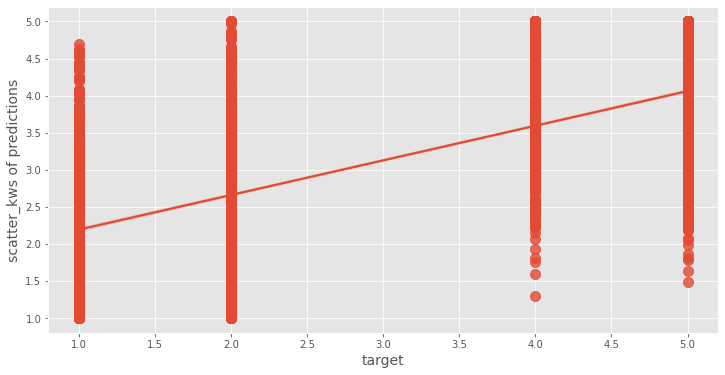

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
    
plt.figure(figsize=(12,6))
p = sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})
p.set_xlabel("target", fontsize = 14)
p.set_ylabel("scatter_kws of predictions", fontsize = 14)

### LGBMClassifier

LightBGM 분류 모델: __정확도 0.613__

- 최적화 (해도 소용없음)
  - RandomizedSearchCV(n_iter=100) : __0.616__ (2시간10분 소요)
    - 한번 실행시 0.613
  - GridSearchCV : 한번 반복당 20~30초 소요
    - 문제는 실행시간: 반복당 10초만 셈해도 2시간이고, 총 4~8시간 소요 
    - ==> 하지말자!

In [ ]:
from sklearn.model_selection import train_test_split

data = train_df
X_train, X_test, y_train, y_test = train_test_split(
    data[ ['reviews','pos_tokens'] ], 
#     data['pos_tokens'], 
    data['target'], 
    test_size=0.2, 
    random_state=42, 
#     shuffle=True, 
    stratify=data['target']   # 분리하기 이전의 클래스 비율을 분리하고 나서도 유지하기 위해 설정해야 하는 값
)

# 크기를 확인합니다.
print( 'train 데이터 셋 모양 :', X_train.shape, y_train.shape)
print( 'test 데이터 셋 모양 :', X_test.shape, y_test.shape)

train 데이터 셋 모양 : (19986, 2) (19986,)
test 데이터 셋 모양 : (4997, 2) (4997,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 벡터화 
# BEST: acc=0.647 (min_df=2, vocab=26419)
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2)
vectorizer.fit(X_train['pos_tokens'])

X_train_vec = vectorizer.transform(X_train['pos_tokens'])
X_test_vec = vectorizer.transform(X_test['pos_tokens'])
print('TfidfVectorizer Shape:', X_train_vec.shape, X_test_vec.shape)
print()

# 변환이 잘 되었나 확인합니다.
print(X_train_vec[10])
print()

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
print(X_train.iloc[10,1])
vectorizer.inverse_transform(X_train_vec[10])

TfidfVectorizer Shape: (19986, 26419) (4997, 26419)

  (0, 23469)	0.7604501949118138
  (0, 10948)	0.6021518552443176
  (0, 3908)	0.2431638219069828

너무 툭 튀어나오고 좀 큼 불편


[array(['튀어나오고', '불편', '너무'], dtype='<U17')]

In [ ]:
# 참고 https://www.projectpro.io/recipes/use-lightgbm-classifier-and-regressor-in-python
# LGBMClassifier

import time
from sklearn import metrics
from lightgbm import LGBMClassifier, Dataset

# LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#         importance_type='split', learning_rate=0.1, max_depth=-1,
#         min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#         n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#         random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

model = LGBMClassifier()  # 0.613
model.fit(X_train_vec, y_train, verbose=-1)
print(); 
print(model)
print('--'*30)

expected_y  = y_test
predicted_y = model.predict(X_test_vec)

print(f'==> Test Accuracy: {metrics.accuracy_score(expected_y, predicted_y):.3f}', end='\n\n')
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))


LGBMClassifier()
------------------------------------------------------------
==> Test Accuracy: 0.613

              precision    recall  f1-score   support

           1       0.54      0.23      0.32       900
           2       0.54      0.77      0.63      1598
           4       0.27      0.03      0.06       500
           5       0.71      0.81      0.76      1999

    accuracy                           0.61      4997
   macro avg       0.51      0.46      0.44      4997
weighted avg       0.58      0.61      0.57      4997

[[ 206  586    5  103]
 [ 157 1224   14  203]
 [   5  123   17  355]
 [  13  343   27 1616]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from lightgbm import LGBMClassifier, Dataset
import time

model = LGBMClassifier()

# Define the parameters : 540가지 조합
parameters = {
    'num_leaves':[20,40,60,80,100], 
    'min_child_samples':[5,10,15],
    'max_depth':[-1,5,10,20],
    'learning_rate':[0.05,0.1,0.2],
    'reg_alpha':[0,0.01,0.03]
}

# Define the scoring: accuracy
clf = GridSearchCV(model, parameters
                   , scoring='accuracy'
                   , n_jobs=-1
                   , cv=KFold(n_splits=2) # 최소 2개 필요
                   , verbose=2
                   )
# 이거 안하면 기본으로 5번 반복(오래걸림)
# cv=KFold(n_splits=2)
# ==> Fitting 2 folds for each of 540 candidates
# ==> total 1080 fits

# 문제는 실행시간: 반복당 10초만 셈해도 2시간이고, 총 4~8시간 소요 
# ==> 하지말자!

start = time.time()

clf.fit(X_train_vec, y_train, verbose=-1)
print('Best params:', clf.best_params_)

predicted=clf.predict(X_test_vec)
print('Classification of the result is:', accuracy_score(y_test, predicted))

end = time.time()
print('Execution time is:', end - start)


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier, Dataset
import time

model = LGBMClassifier()

# Define the parameters
parameters = {
    'num_leaves':[20,40,60,80,100], 
    'min_child_samples':[5,10,15],
    'max_depth':[-1,5,10,20],
    'learning_rate':[0.05,0.1,0.2],
    'reg_alpha':[0,0.01,0.03]
}

# Define the scoring: accuracy = ?(기본), 0.616(ngram13)
# - cv=2, n_iter=1 일때 2회 반복 
# - CV 안쓰는게 제일 빠름: 20~30초 소요 (표준 런타임)
clf = RandomizedSearchCV(model, parameters
                         , scoring='accuracy'
                         , n_jobs=-1
                         #, cv=5  #KFold(n_splits=2) # 최소 2개 필요
                         , n_iter=100
                         , verbose=1)

start = time.time()

clf.fit(X_train_vec, y_train, verbose=-1)
print('Best params:', clf.best_params_)

predicted=clf.predict(X_test_vec)
print('Classification of the result is:', accuracy_score(y_test, predicted))

end = time.time()
print('Execution time is:', end - start)

# ==================================

# ** version 2
# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best params: {'reg_alpha': 0.03, 'num_leaves': 20, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.2}
# Classification of the result is: 0.6159695817490495
# Execution time is: 8314.608586788177 (2시간 10분)

# ==================================

# ** version 1
# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best params: {'reg_alpha': 0.03, 'num_leaves': 60, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.1}
# Classification of the result is: 0.619
# Execution time is: 4855.534898281097 (1시간 20분)

# ==================================

# ** 1회 실행시
# Fitting 5 folds for each of 1 candidates, totalling 5 fits
# Best params: {'reg_alpha': 0.03, 'num_leaves': 60, 'min_child_samples': 15, 'max_depth': 10, 'learning_rate': 0.1}
# Classification of the result is: 0.5984
# Execution time is: 29.770291566848755


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params: {'reg_alpha': 0.03, 'num_leaves': 20, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.2}
Classification of the result is: 0.6159695817490495
Execution time is: 8314.608586788177
